<h2 id="exercises">Exercises</h2>
<p>Do your work for these exercises in a jupyter notebook named <code>scaling</code>. Use the zillo dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.</p>


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from split_scale import split_my_data, standard_scaler, gen_scaler

import zillo_wrangle

In [2]:
zillo = zillo_wrangle.wrangle_zillow()

In [3]:
zillo.head()

,bedrooms,bathrooms,square_feet,home_value,year,taxes,fips_number
0,2.0,2.0,1574,728162.0,1937.0,8402.20,6037.0
1,2.0,1.0,1034,175643.0,1924.0,2165.10,6037.0
2,4.0,2.0,1722,348956.0,1961.0,4238.44,6037.0
3,3.0,2.0,1961,812199.0,1948.0,9568.47,6037.0
4,3.0,2.0,1237,471166.0,1944.0,5610.38,6037.0


---

<ol>
<li>Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .</li>

</ol>

## Need to finish dealing with outliers before scaling

In [4]:
dd = pd.read_excel('zillow_data_dictionary.xlsx')
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [5]:
zillo.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55588 entries, 0 to 55614
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     55588 non-null  float64
 1   bathrooms    55588 non-null  float64
 2   square_feet  55588 non-null  int64  
 3   home_value   55588 non-null  float64
 4   year         55588 non-null  object 
 5   taxes        55588 non-null  float64
 6   fips_number  55588 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.4+ MB


In [6]:
# get total of null values for each row
zillo.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
home_value     0
year           0
taxes          0
fips_number    0
dtype: int64

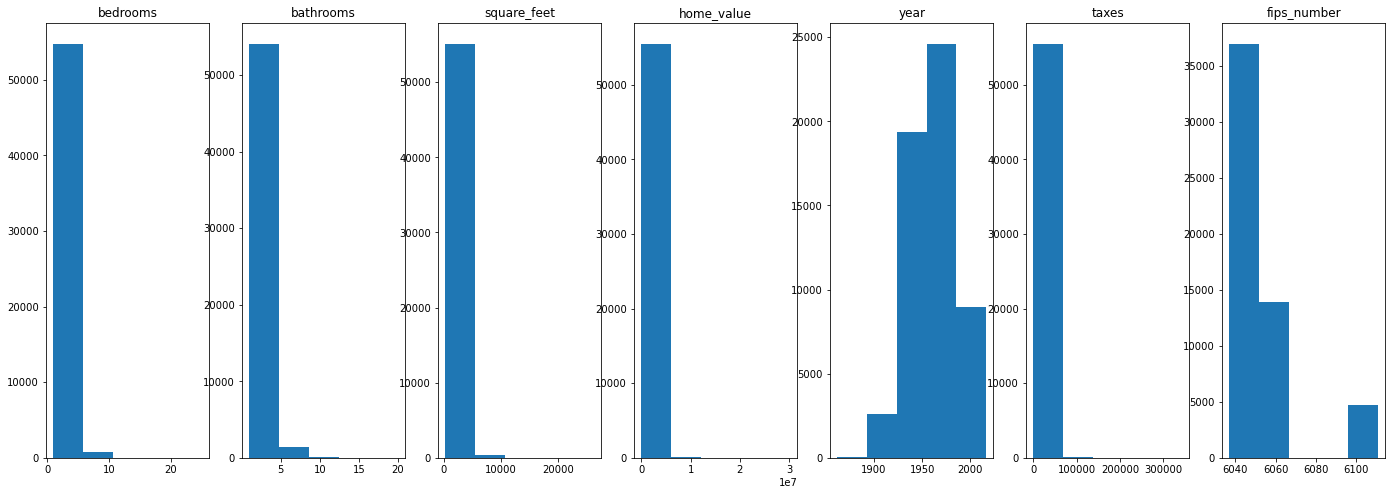

In [7]:
plt.figure(figsize=(24, 8))

# List of columns
cols = [col for col in zillo.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillo[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

<AxesSubplot:>

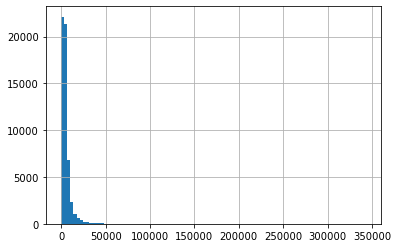

In [8]:
# Looking at tax_value in closer detail
zillo['taxes'].hist(bins=100)

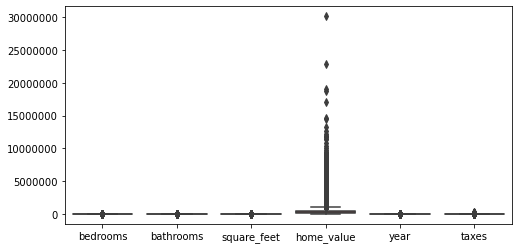

In [9]:
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=zillo.drop(columns=['fips_number']))

plt.show()

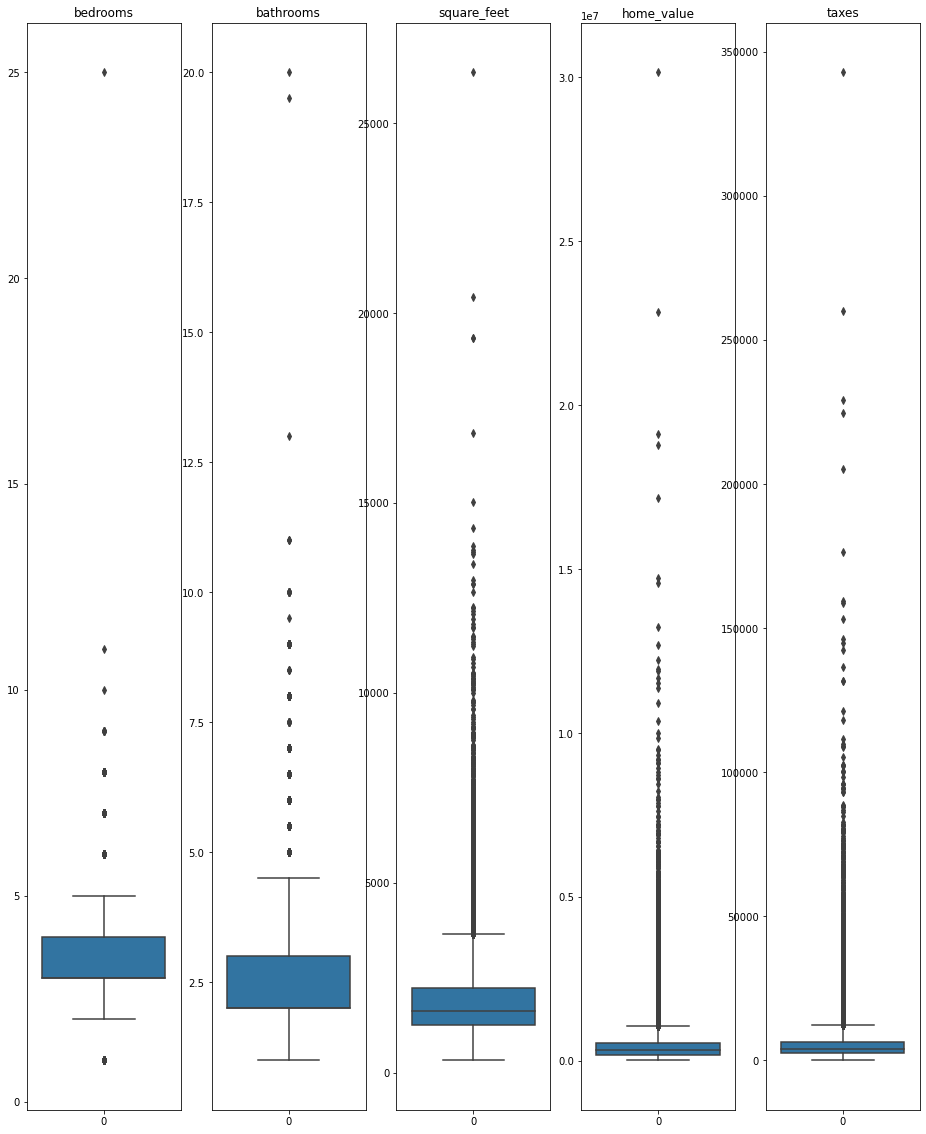

In [10]:
# List of columns
cols = [col for col in zillo.columns if col not in ['fips_number', 'year']]
plt.figure(figsize=(16, 20))
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=zillo[col])

    # Hide gridlines.
    plt.grid(False)

plt.show()

In [11]:
zillo.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bedrooms,bathrooms,square_feet,home_value,taxes
count,55588,55588,55588,55588,55588
mean,3.31138,2.25488,1870.21,456879,5566.99
std,0.924005,0.992818,964.141,593725,6827.04
min,1,1,320,9762,20.24
25%,3,2,1262,188732,2539.72
50%,3,2,1631,330507,4139.22
75%,4,3,2217,534668,6415.89
max,25,20,26345,3.01668e+07,342940


In [12]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [13]:
zillo.dtypes

bedrooms       float64
bathrooms      float64
square_feet      int64
home_value     float64
year            object
taxes          float64
fips_number     object
dtype: object

In [14]:
zillo = remove_outliers(zillo, 1.5, ['bedrooms', 'bathrooms', 'square_feet', 'home_value', 'taxes'])
zillo

,bedrooms,bathrooms,square_feet,home_value,year,taxes,fips_number
0,2.0,2.0,1574,728162.0,1937.0,8402.20,6037.0
1,2.0,1.0,1034,175643.0,1924.0,2165.10,6037.0
2,4.0,2.0,1722,348956.0,1961.0,4238.44,6037.0
3,3.0,2.0,1961,812199.0,1948.0,9568.47,6037.0
4,3.0,2.0,1237,471166.0,1944.0,5610.38,6037.0
...,...,...,...,...,...,...,...
55609,4.0,3.5,2475,838781.0,1988.0,10391.76,6111.0
55610,3.0,2.5,2466,534594.0,1989.0,6904.60,6111.0
55611,3.0,2.5,1366,530301.0,1984.0,6849.40,6111.0
55612,3.0,2.5,1623,301896.0,1985.0,4229.90,6111.0


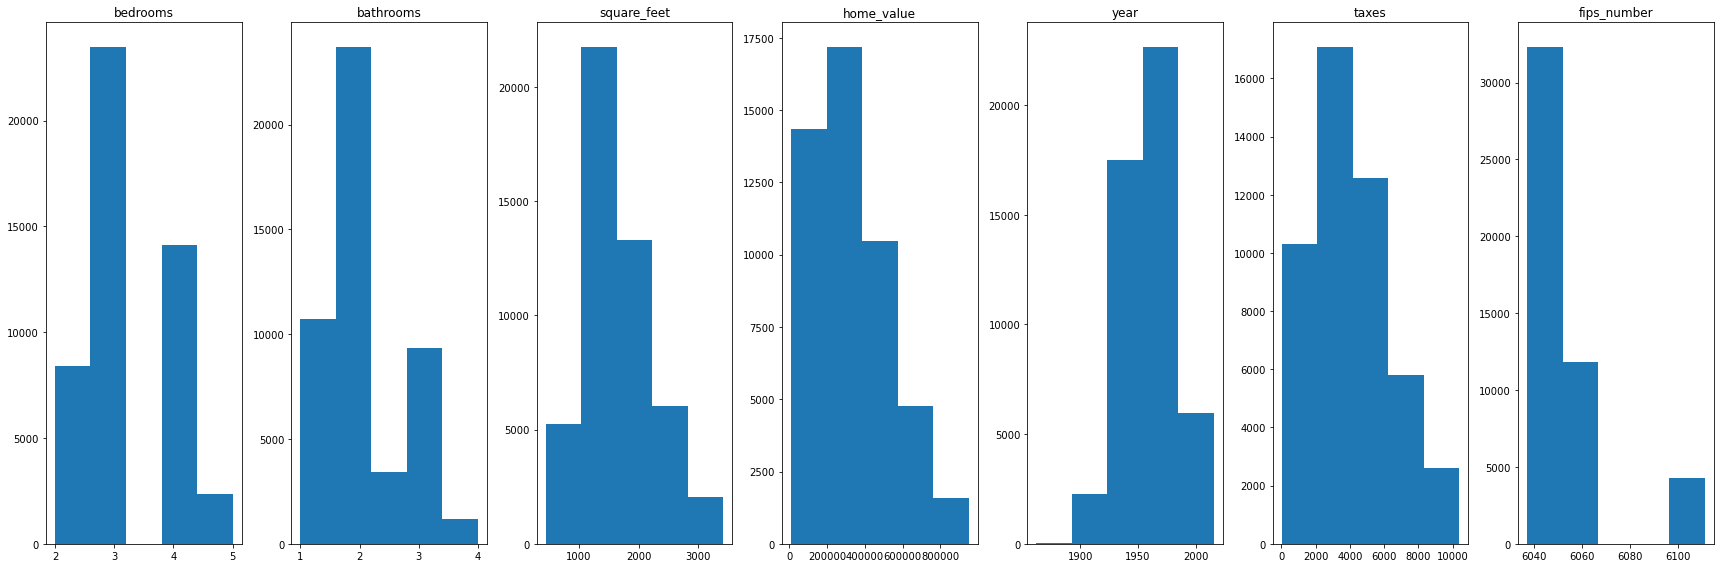

In [15]:
plt.figure(figsize=(24, 8))

# List of columns
cols = [col for col in zillo.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillo[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()
    
plt.show()

In [16]:
zillo.dtypes

bedrooms       float64
bathrooms      float64
square_feet      int64
home_value     float64
year            object
taxes          float64
fips_number     object
dtype: object

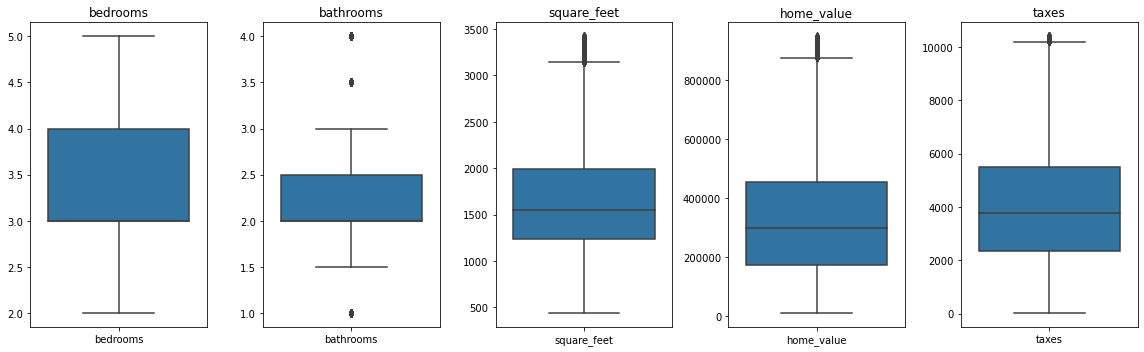

In [17]:
# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'home_value', 'taxes']

plt.figure(figsize=(16, 5))

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=zillo[[col]])

    # Hide gridlines.
    plt.grid(False)

    # sets proper spacing between plots
    plt.tight_layout()
    
plt.show()

In [18]:
# get total of null values for each row
zillo.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
home_value     0
year           0
taxes          0
fips_number    0
dtype: int64

In [19]:
# get value counts and decide on data types
cols = zillo.columns

for col in cols:
    
    print(col.upper())
    print(zillo[col].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

BEDROOMS
3.0    23464
4.0    14123
2.0     8390
5.0     2372
Name: bedrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

BATHROOMS
2.0    23695
1.0     9924
3.0     9331
2.5     3447
4.0      824
1.5      784
3.5      344
Name: bathrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

SQUARE_FEET
1200    134
1080    111
1120    105
1040     99
1400     97
       ... 
3383      1
3338      1
3370      1
3295      1
484       1
Name: square_feet, Length: 2772, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

HOME_VALUE
460000.0    24
440000.0    22
450000.0    22
425000.0    22
520000.0    20
            ..
70441.0      1
470126.0     1
266221.0     1
206271.0     1
160855.0     1
Name: home_value, Length: 37449, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

YEAR
1955.0    2041
1954.0    1751
1950.0    1730
1956.0    1590
1953.0    1498
          ... 
1889.0       1
1888.0       1
1887.0       1
1886.0       1
2016.0       1
Name: year, Length: 133, dtype: int64
~~~~~~~

In [20]:
# Make categorical values categotical data types
zillo.fips_number = zillo.fips_number.astype(object)
zillo.year = zillo.year.astype(object)

In [21]:
zillo.dtypes

bedrooms       float64
bathrooms      float64
square_feet      int64
home_value     float64
year            object
taxes          float64
fips_number     object
dtype: object

In [22]:
zillo_train, zillo_validate, zillo_test = split_my_data(zillo)


## Standard Scaler

In [23]:
zillo.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'home_value', 'year', 'taxes',
       'fips_number'],
      dtype='object')

In [24]:
scaler, zillo_train_scaled, zillo_validate_scaled, zillo_test_scaled = standard_scaler(['bedrooms', 'bathrooms', 'square_feet', 'home_value', 'year', 'taxes'], zillo_train, zillo_validate, zillo_test)


In [25]:
scaler

StandardScaler()

In [26]:
zillo_train_scaled.head()

,bedrooms,bathrooms,square_feet,home_value,year,taxes,fips_number,bedrooms_scaled,bathrooms_scaled,square_feet_scaled,home_value_scaled,year_scaled,taxes_scaled,fips_number_scaled
21903,4.0,4.0,2396,555705.0,1951.0,6668.54,6037.0,0.997625,2.733130,1.294085,1.130225,-0.422184,1.147144,-0.552393
9612,5.0,2.0,1495,189756.0,1944.0,2353.18,6037.0,2.270334,-0.085388,-0.291139,-0.699285,-0.765292,-0.768616,-0.552393
8374,2.0,1.0,840,106168.0,1925.0,1531.23,6037.0,-1.547793,-1.494648,-1.443549,-1.117171,-1.696588,-1.133512,-0.552393
24284,2.0,2.0,1575,194414.0,1941.0,2387.22,6037.0,-1.547793,-0.085388,-0.150387,-0.675998,-0.912339,-0.753504,-0.552393
5436,4.0,3.0,2100,290490.0,1948.0,3743.67,6037.0,0.997625,1.323871,0.773301,-0.195680,-0.569230,-0.151322,-0.552393


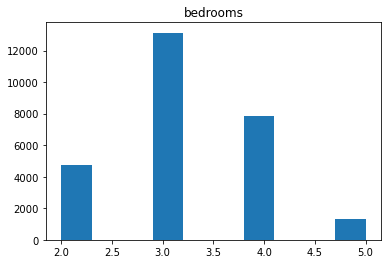

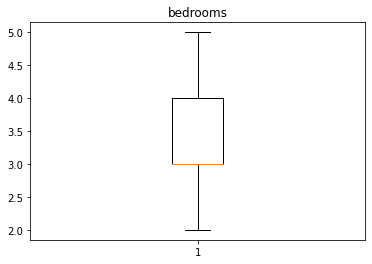

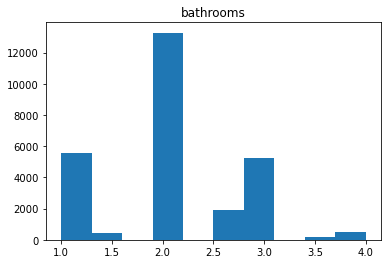

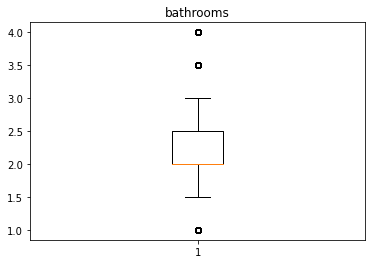

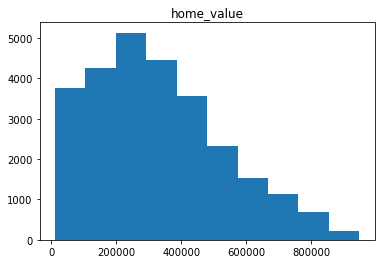

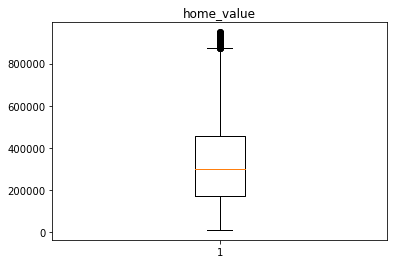

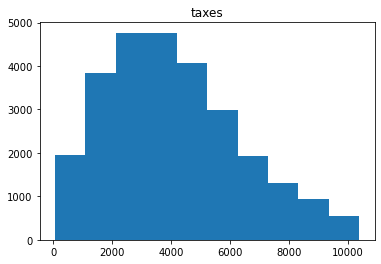

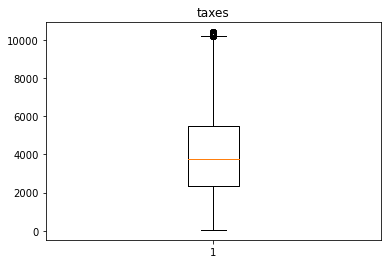

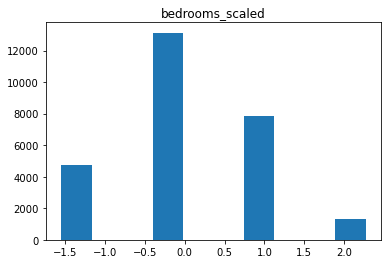

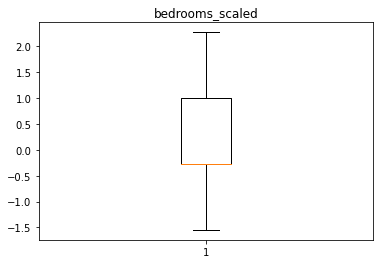

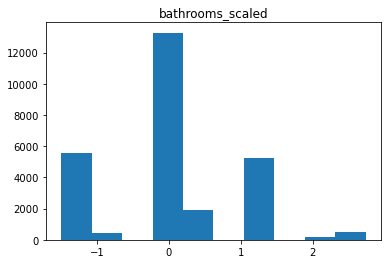

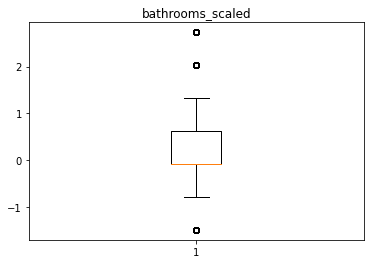

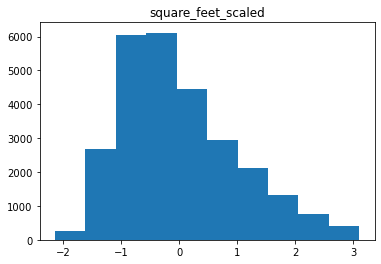

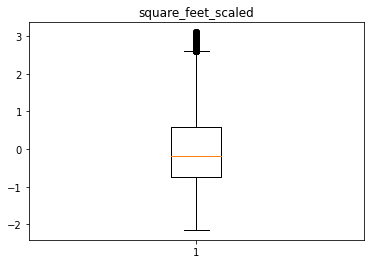

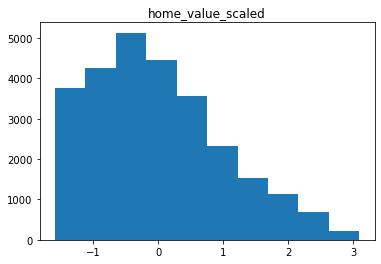

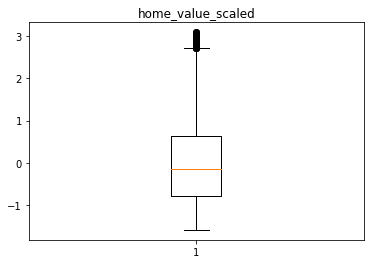

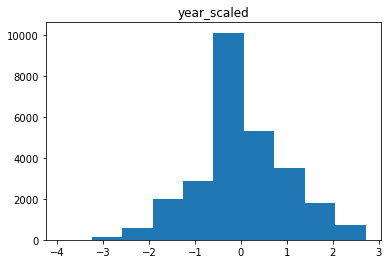

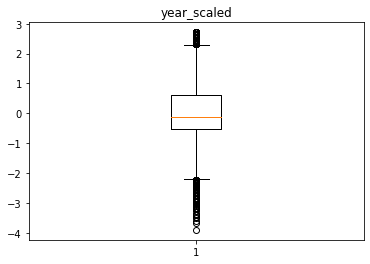

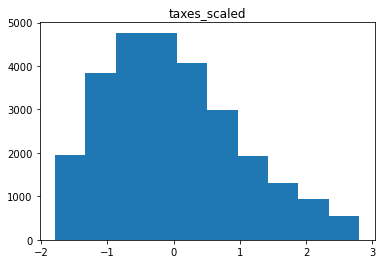

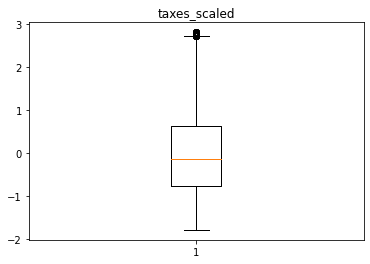

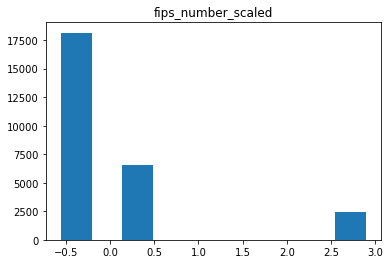

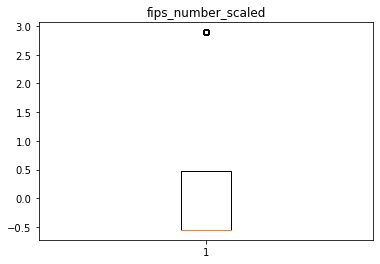

In [27]:
# Plot numeric columns
num_cols = zillo_train_scaled.columns[[zillo_train_scaled[col].dtype == 'float64' for col in zillo_train_scaled.columns]]
for col in num_cols:
    plt.hist(zillo_train_scaled[col])
    plt.title(col)
    plt.show()
    plt.boxplot(zillo_train_scaled[col])
    plt.title(col)
    plt.show()

In [ ]:
zillo_test_scaled.head()

In [ ]:
sns.heatmap(zillo_test_scaled.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column')
plt.show()

In [ ]:
zillo_test_scaled.isnull().sum()

In [ ]:
zillo_test_scaled.isna().sum()

2. Apply the <code>.inverse_transform</code> method to your scaled data. Is the resulting dataset the exact same as the original data?</li>


3. Read the documentation for sklearn's <code>QuantileTransformer</code>. Use <code>normal</code> for the <code>output_distribution</code> and apply this scaler to your data. Visualize the result of your data scaling.</li>


4. Use the <code>QuantileTransformer</code>, but omit the <code>output_distribution</code> argument. Visualize your results. What do you notice?</li>

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your <code>prepare.py</code> that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!</li>